In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('netflix_users.csv')
print(df.head())

   User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login  
0          Drama  2024-05-12  
1         Sci-Fi  2025-02-05  
2         Comedy  2025-01-24  
3    Documentary  2024-03-25  
4          Drama  2025-01-14  


In [7]:
print(df.shape)
print(df.isnull().sum())
print(df.describe())

(25000, 8)
User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64
            User_ID           Age  Watch_Time_Hours
count  25000.000000  25000.000000      25000.000000
mean   12500.500000     46.482880        500.468858
std     7217.022701     19.594861        286.381815
min        1.000000     13.000000          0.120000
25%     6250.750000     29.000000        256.567500
50%    12500.500000     46.000000        501.505000
75%    18750.250000     63.000000        745.732500
max    25000.000000     80.000000        999.990000


In [9]:
df = df.dropna()
df = df.drop_duplicates()

In [17]:
# Calculate daily average watch time
df['Daily_Avg_Hours'] = df['Watch_Time_Hours'] / 30

# Flag binge-watchers: more than 4 hours daily
df['Binge_Watcher'] = (df['Daily_Avg_Hours'] > 4).astype(int)

In [19]:
percent = df['Binge_Watcher'].mean() * 100
print(f"Percentage of binge watchers: {percent:.2f}%")

Percentage of binge watchers: 88.18%


In [21]:
print(df.head())

   User_ID            Name  Age Country Subscription_Type  Watch_Time_Hours  \
0        1  James Martinez   18  France           Premium             80.26   
1        2     John Miller   23     USA           Premium            321.75   
2        3      Emma Davis   60      UK             Basic             35.89   
3        4     Emma Miller   44     USA           Premium            261.56   
4        5      Jane Smith   68     USA          Standard            909.30   

  Favorite_Genre  Last_Login  Binge_Watcher  Daily_Avg_Hours  
0          Drama  2024-05-12              0         2.675333  
1         Sci-Fi  2025-02-05              1        10.725000  
2         Comedy  2025-01-24              0         1.196333  
3    Documentary  2024-03-25              1         8.718667  
4          Drama  2025-01-14              1        30.310000  


In [23]:
binge_by_sub = df.groupby('Subscription_Type')['Binge_Watcher'].mean() * 100
print(binge_by_sub)

Subscription_Type
Basic       88.427477
Premium     88.133778
Standard    87.964086
Name: Binge_Watcher, dtype: float64


# 📊 Binge-Watchers vs Non-Binge-Watchers

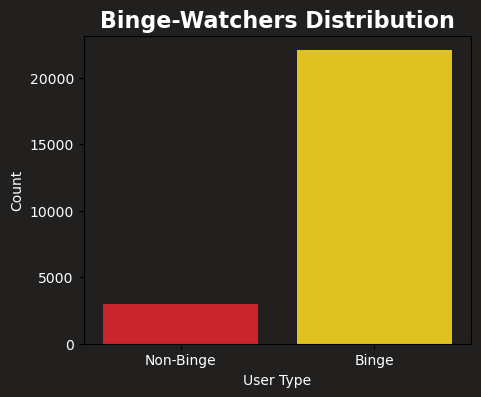

In [243]:
# Colors
import seaborn as sns

# Colors
netflix_red = "#E50914"
charcoal_black = "#221F1F"
popcorn_yellow = "#FFD700"

plt.figure(figsize=(5,4))
sns.countplot(
    x='Binge_Watcher', 
    hue='Binge_Watcher', 
    data=df, 
    palette=[netflix_red, popcorn_yellow], 
    legend=False
)
plt.xticks([0, 1], ['Non-Binge', 'Binge'], color='white')
plt.title('Binge-Watchers Distribution', fontsize=16, color='white', weight='bold')
plt.xlabel('User Type', color='white')
plt.ylabel('Count', color='white')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.yticks(color='white')
plt.show()

# 📈Daily Average Watch Time Distribution

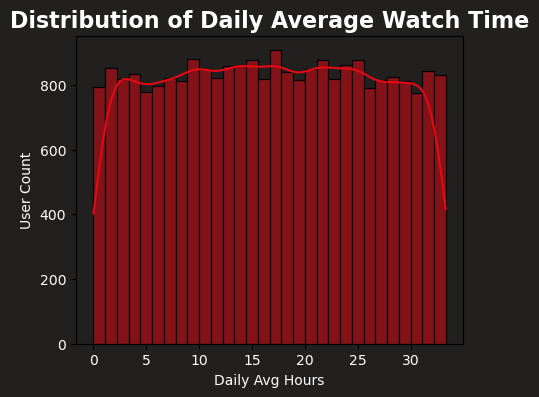

In [245]:
plt.figure(figsize=(5,4))
sns.histplot(
    df['Daily_Avg_Hours'], 
    bins=30, 
    kde=True, 
    color=netflix_red
)
plt.title('Distribution of Daily Average Watch Time', fontsize=16, color='white', weight='bold')
plt.xlabel('Daily Avg Hours', color='white')
plt.ylabel('User Count', color='white')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# 🧠 Age vs Watch Time

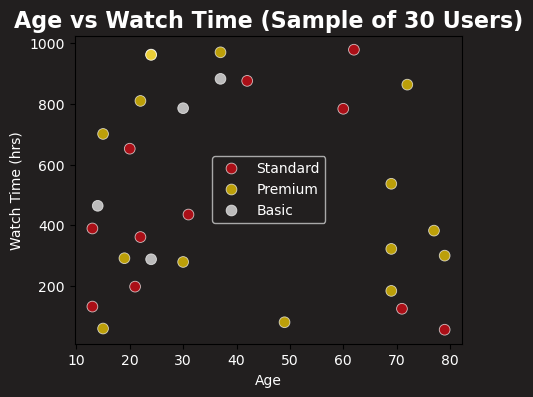

In [247]:
sample_df = df.sample(n=30, random_state=42)

plt.figure(figsize=(5,4))
sns.scatterplot(
    x='Age',
    y='Watch_Time_Hours',
    hue='Subscription_Type',
    data=sample_df,
    s=60,
    alpha=0.7,
    palette=[netflix_red, popcorn_yellow, 'white']
)
plt.title('Age vs Watch Time (Sample of 30 Users)', fontsize=16, color='white', weight='bold')
plt.xlabel('Age', color='white')
plt.ylabel('Watch Time (hrs)', color='white')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(facecolor=charcoal_black, labelcolor='white')
plt.show()

# Genre Preference By Age Group

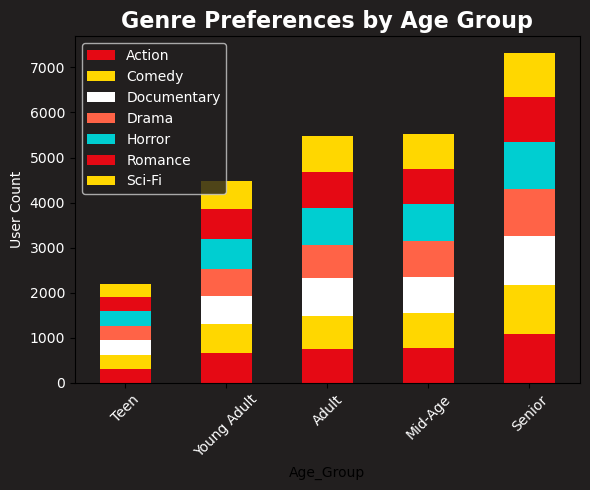

In [261]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Mid-Age', 'Senior'])

genre_age = df.groupby(['Age_Group', 'Favorite_Genre'], observed=True).size().unstack().fillna(0)

ax = genre_age.plot(kind='bar', stacked=True, figsize=(6,5),
                    color=[netflix_red, popcorn_yellow, 'white', '#FF6347', '#00CED1'])

plt.title('Genre Preferences by Age Group', fontsize=16, color='white', weight='bold')
plt.ylabel('User Count', color='white')
plt.yticks(color='white')

for tick_label in ax.get_xticklabels():
    tick_label.set_color('white')
    tick_label.set_rotation(45)

ax.set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)

plt.legend(facecolor=charcoal_black, labelcolor='white')

plt.tight_layout()
plt.show()

# User Login Recency

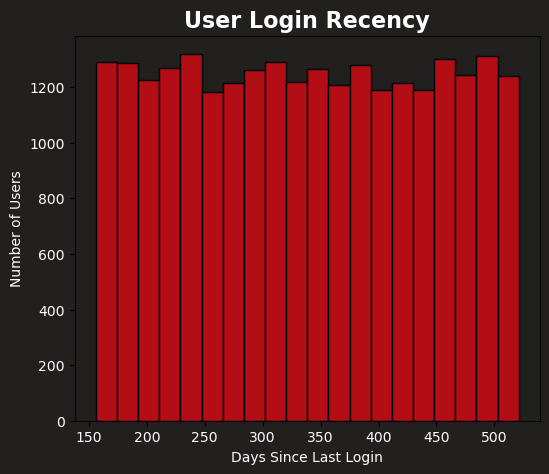

In [263]:
plt.figure(figsize=(6,5))
sns.histplot(df['Days_Since_Login'], bins=20, color=netflix_red, kde=False)
plt.title('User Login Recency', fontsize=16, color='white', weight='bold')
plt.xlabel('Days Since Last Login', color='white')
plt.ylabel('Number of Users', color='white')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Correlation between Numeric Features

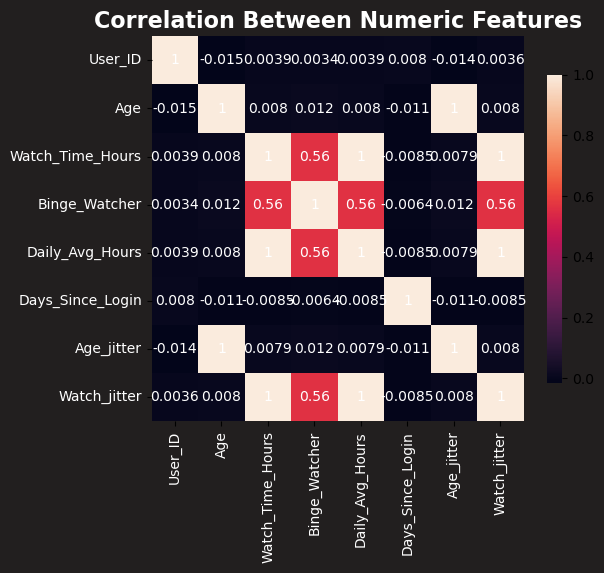

In [265]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='rocket', 
            annot_kws={'color':'white'}, cbar_kws={'shrink':0.8})
plt.title('Correlation Between Numeric Features', fontsize=16, color='white', weight='bold')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

#  Watch Time Distribution By Country

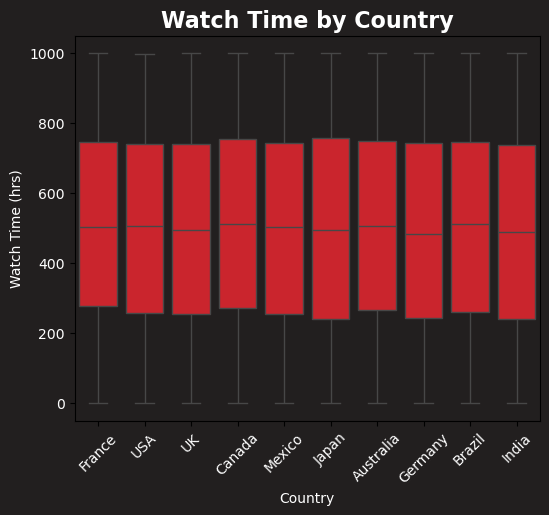

In [267]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Country', y='Watch_Time_Hours', data=df, color=netflix_red)
plt.title('Watch Time by Country', fontsize=16, color='white', weight='bold')
plt.xlabel('Country', color='white')
plt.ylabel('Watch Time (hrs)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.show()

# User Segmentation by Subscription Type

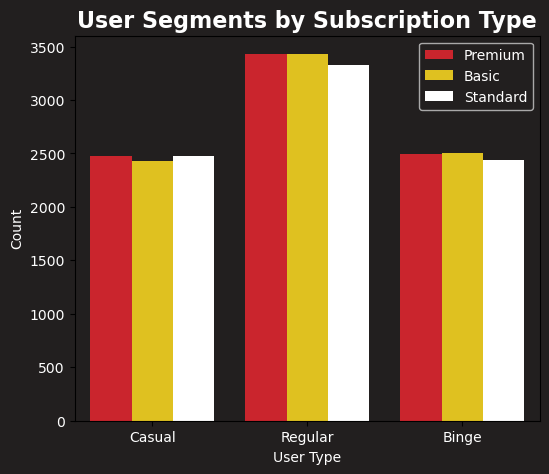

In [269]:
df['User_Type'] = pd.cut(df['Watch_Time_Hours'], bins=[0, 300, 700, 1000], 
                         labels=['Casual', 'Regular', 'Binge'])

plt.figure(figsize=(6,5))
sns.countplot(x='User_Type', hue='Subscription_Type', data=df, 
              palette=[netflix_red, popcorn_yellow, 'white'])
plt.title('User Segments by Subscription Type', fontsize=16, color='white', weight='bold')
plt.xlabel('User Type', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.legend(facecolor=charcoal_black, labelcolor='white')
plt.show()

# Subscription Type Usage by Country

In [154]:
country_counts = df['Country'].value_counts()

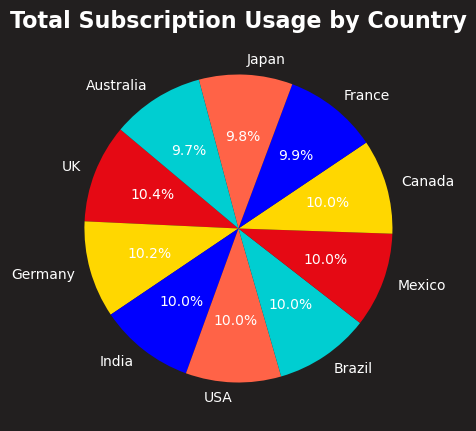

In [271]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.pie(country_counts, 
        labels=country_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=[netflix_red, popcorn_yellow, 'blue', '#FF6347', '#00CED1'],
        textprops={'color': 'white'})
plt.title('Total Subscription Usage by Country', fontsize=16, color='white', weight='bold')
plt.gcf().set_facecolor(charcoal_black)
plt.show()

##### top_countries = df.groupby('Subscription_Type')['Country'].value_counts().groupby(level=0).idxmax()
print(top_countries)

# User Login Activity Over Time

In [165]:
df['Last_Login'] = pd.to_datetime(df['Last_Login'], dayfirst=True)

In [167]:
df['Login_Month'] = df['Last_Login'].dt.to_period('M')

In [169]:
monthly_logins = df['Login_Month'].value_counts().sort_index()

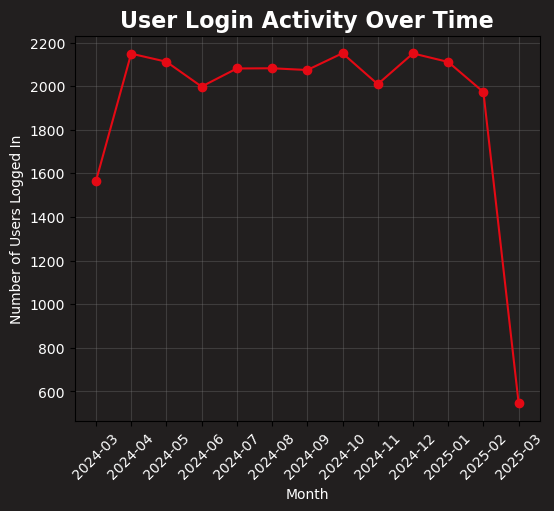

In [273]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.plot(monthly_logins.index.astype(str),  # convert index to strings for plotting
         monthly_logins.values, 
         marker='o', 
         color=netflix_red)

plt.title('User Login Activity Over Time', fontsize=16, color='white', weight='bold')
plt.xlabel('Month', color='white')
plt.ylabel('Number of Users Logged In', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, color='gray', alpha=0.3)
plt.gca().set_facecolor(charcoal_black)
plt.gcf().set_facecolor(charcoal_black)
plt.show()